In [4]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [5]:
# Pfad zum Ordner mit den Bildern
data_dir = 'files/dataset'

# Initialisiere den ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisiere die Pixelwerte zwischen 0 und 1
    validation_split=0.3  # Optionale Aufteilung in Trainings- und Validierungsdaten
)

# Erstelle Datensätze für Training und Validierung/Test
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),  # Die Zielgröße der Bilder (angepasst an CIFAR-10)
    batch_size=32,
    class_mode='binary',  # oder 'categorical' für mehr als zwei Klassen
    subset='training'  # Für den Trainingsdatensatz
)

validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Für den Validierungs-/Testdatensatz
)

Found 7093 images belonging to 10 classes.
Found 3035 images belonging to 10 classes.


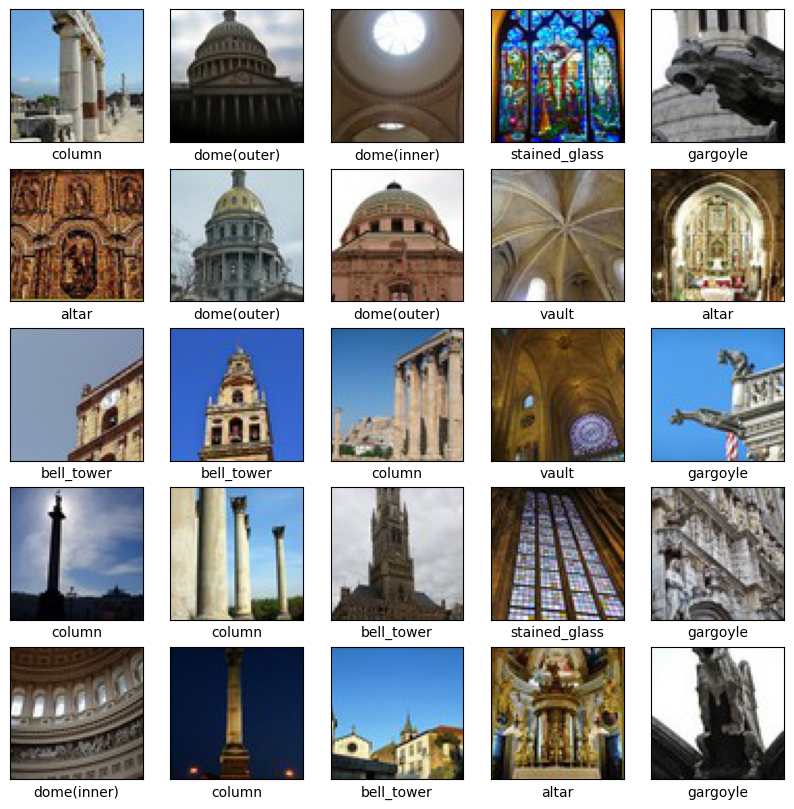

In [12]:
class_names = ['altar', 'apse', 'bell_tower', 'column', 'dome(inner)',
               'dome(outer)', 'flying_buttress', 'gargoyle', 'stained_glass', 'vault']

plt.figure(figsize=(10,10))

# Nur einen Batch von Bildern und Labels holen
images, labels = next(train_generator)

for i in range(25):  # Angenommen, der Batch hat mindestens 25 Bilder
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i])

    # Sicherstellen, dass label_index als ein Integer behandelt wird
    label_index = labels[i].astype(int)  # Konvertiere explizit zu int
    if label_index.shape != ():  # Wenn die Labels One-Hot-Encoded sind
        label_index = np.argmax(label_index)  # Konvertiere One-Hot zu Index
    plt.xlabel(class_names[label_index])
plt.show()